Gradient Descent: Logistic Regression Example
======

Suppose we have 2-dimensional data, where there are two classes. Both the "positive" class and the "negative" class have Gaussian distributions.

Mean(PositiveClass) = [2, 2]  
Mean(NegativeClass) = [−2, −2]  
Covariance(PositiveClass) = Covariance(NegativeClass) = [ [ 0.1, 0.0], [ 0.0, 0.1 ] ] 


---
Create the Data
------

In [1]:
import numpy as np

proportion_positive = 0.5
proportion_negative = 1 - proportion_positive

count = 1000

mu_positive = np.array([  2,  2 ])
mu_negative = np.array([ -2, -2 ])
Sigma = np.array([ [ 0.1, 0 ], [ 0, 0.1 ] ])

Xpos = np.random.multivariate_normal(mean = mu_positive,
                                     cov = Sigma,
                                     size = int(proportion_positive * count))
Xneg = np.random.multivariate_normal(mean = mu_negative,
                                     cov = Sigma,
                                     size = int(proportion_negative * count))

X = np.concatenate((Xpos, Xneg), axis = 0).astype("float32")
Y = np.array([1]*int(proportion_positive * count) + [0]*int(proportion_negative * count)).astype("float32")
index = np.arange(count)
np.random.shuffle(index)

trnCount = int(0.8 * count)
valCount = int(0.1 * count)
tstCount = int(0.1 * count)

trnX = X[index[:trnCount]]
trnY = Y[index[:trnCount]]
valX = X[index[trnCount:(trnCount+valCount)]]
valY = Y[index[trnCount:(trnCount+valCount)]]
tstX = X[index[(trnCount+valCount):(trnCount+valCount+tstCount)]]
tstY = Y[index[(trnCount+valCount):(trnCount+valCount+tstCount)]]

print("trn shapes:", trnX.shape, trnY.shape, sep = "\t")
print("val shapes:", valX.shape, valY.shape, sep = "\t")
print("tst shapes:", tstX.shape, tstY.shape, sep = "\t")

trn shapes:	(800, 2)	(800,)
val shapes:	(100, 2)	(100,)
tst shapes:	(100, 2)	(100,)


---
Plot the Data
------

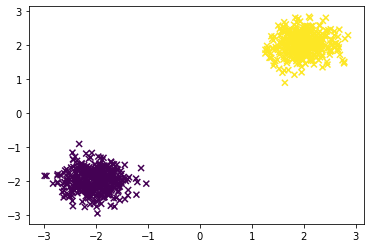

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(trnX[:,0], trnX[:,1], c = trnY, marker = 'x')
plt.show()

---
Create the Error Surface
------

In [3]:
from scipy.integrate import dblquad

Sigma_Inverse = np.linalg.inv(Sigma)
norm = np.sqrt(((np.float(2) * np.pi)**2) * np.linalg.det(Sigma))

def loss(y, x, w):
    observation = np.array([ x, y ])
    probability_positive = np.float(1.0 / (1.0 + np.exp( - np.matmul(np.transpose(observation), w))))
    probability_negative = np.float(1.0 - probability_positive)
    difference_positive = observation - mu_positive
    density_positive = np.exp(-0.5 \
                              * np.matmul(np.matmul(np.transpose(difference_positive), Sigma_Inverse), \
                                          difference_positive) \
                             ) / norm
    difference_negative = observation - mu_negative
    density_negative = np.exp(-0.5 \
                              * np.matmul(np.matmul(np.transpose(difference_negative), Sigma_Inverse), \
                                          difference_negative) \
                             ) / norm
    return (  proportion_positive * density_positive * -np.log(probability_positive) \
            + proportion_negative * density_negative * -np.log(probability_negative))

X = np.linspace(-2, 2, 11)
Y = np.linspace(-2, 2, 11)
X, Y = np.meshgrid(X, Y)
Z = np.zeros((Y.shape[0], X.shape[1]))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        weights = np.array([ X[i,j], Y[i,j] ])    # bias = 0
        Z[i,j] = dblquad(loss, -6, 6, -6, 6, args = [ weights ])[0]
np.save("X.npy", X)
np.save("Y.npy", Y)
np.save("Z.npy", Z)

---
Plot the Error Surface
------

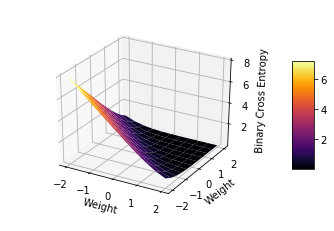

In [4]:
X = np.load("X.npy")
Y = np.load("Y.npy")
Z = np.load("Z.npy")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
fig = plt.figure()
ax = fig.gca(projection = "3d")
surf = ax.plot_surface(X, Y, Z, cmap = cm.inferno, linewidth = 0, antialiased = True)
ax.set_xlabel("Weight")
ax.set_ylabel("Weight")
ax.set_zlabel("Binary Cross Entropy")
ax.dist = 12
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

---
What is the lowest point on the error surface?
------

In [5]:
np.set_printoptions(precision=6)
np.set_printoptions(linewidth=120)
np.set_printoptions(suppress=True)

Z = np.load("Z.npy")
print("Cross Entropy Matrix:")
print("w = (-2, -2) appears in the lower, left-hand corner")
print("w = (2, 2) appears in the upper, right-hand corner")
print(np.rot90(Z))

Cross Entropy Matrix:
w = (-2, -2) appears in the lower, left-hand corner
w = (2, 2) appears in the upper, right-hand corner
[[0.785074 0.438175 0.222425 0.105541 0.048409 0.022009 0.010056 0.004646 0.002177 0.001035 0.0005  ]
 [1.238175 0.753609 0.412705 0.20648  0.09757  0.045009 0.020702 0.009594 0.004501 0.002142 0.001035]
 [1.822425 1.212705 0.72796  0.393024 0.195144 0.092431 0.043057 0.020074 0.009445 0.004501 0.002177]
 [2.505541 1.80648  1.193024 0.708901 0.379609 0.188384 0.089919 0.042421 0.020074 0.009594 0.004646]
 [3.248409 2.49757  1.795144 1.179609 0.697131 0.37281  0.18614  0.089919 0.043057 0.020702 0.010056]
 [4.022009 3.245009 2.492431 1.788384 1.17281  0.693147 0.37281  0.188384 0.092431 0.045009 0.022009]
 [4.810056 4.020702 3.243057 2.489919 1.78614  1.17281  0.697131 0.379609 0.195144 0.09757  0.048409]
 [5.604646 4.809594 4.020074 3.242421 2.489919 1.788384 1.179609 0.708901 0.393024 0.20648  0.105541]
 [6.402177 5.604501 4.809445 4.020074 3.243057 2.492431 1.7

---
Create the Model
------

In [6]:
import tensorflow
from tensorflow.keras import models, layers, optimizers
tensorflow.random.set_seed(1)

model = models.Sequential()
model.add(layers.Dense(1, input_shape = (trnX.shape[1],), activation = "sigmoid", use_bias = False))
model.summary()
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(), metrics = [ "accuracy" ])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


---
Prediction for a Single Example
------

In [7]:
old_weights = model.get_weights()
print(old_weights)
print(model.predict(trnX[:1]))

np1 = np.float32(1)
def sigmoid(x):
    np1 = np.float32(1)
    return np1 / (np1 + np.exp(-x))

prediction = sigmoid(trnX[0,0] * old_weights[0][0,0] + trnX[0,1] * old_weights[0][1,0])
print(prediction)

[array([[-0.947153],
       [ 1.13556 ]], dtype=float32)]
1/1 [==============================] - 1s 750ms/step
[[0.503155]]
0.5031553


---
Train on a Single Example
------

In [8]:
model.fit(trnX[:1], trnY[:1], epochs = 1, batch_size = 1)
new_weights = model.get_weights()
print(new_weights[0] - old_weights[0])

1/1 [==============================] - 0s 130ms/step - loss: 0.6995 - accuracy: 0.0000e+00
[[0.010952]
 [0.009079]]


In [9]:
activation = prediction
lr = model.optimizer.lr.numpy()    # learning rate
u0 = - lr * ((activation - trnY[0]) / (activation * (np1 - activation))) * (activation * (np1 - activation)) * trnX[0,0]
u1 = - lr * ((activation - trnY[0]) / (activation * (np1 - activation))) * (activation * (np1 - activation)) * trnX[0,1]
print(u0, u1)

0.010951752 0.009078759


---
Prediction for a Batch of Examples
------

In [10]:
old_weights = model.get_weights()
indices = slice(1, 5)
batch_size = indices.stop - indices.start
print(model.predict(trnX[indices]))
predictions = sigmoid(np.dot(trnX[indices], old_weights[0]))
print(predictions)

1/1 [==============================] - 0s 11ms/step
[[0.618855]
 [0.515279]
 [0.556261]
 [0.334976]]
[[0.618855]
 [0.515279]
 [0.556261]
 [0.334976]]


---
Train on a Batch of Examples
------

In [11]:
old_weights = model.get_weights()
model.fit(trnX[indices], trnY[indices], epochs = 1, batch_size = batch_size)
new_weights = model.get_weights()
print(new_weights[0] - old_weights[0])

1/1 [==============================] - 0s 90ms/step - loss: 0.6061 - accuracy: 0.5000
[[0.009954]
 [0.008703]]


In [12]:
lr = model.optimizer.lr.numpy()    # learning rate
update = - lr * np.dot(np.transpose(trnX[indices]), (predictions - trnY[indices].reshape(batch_size, 1)) / (predictions * (np1 - predictions)) * (predictions * (1 - predictions))) / batch_size
print(update)

[[0.009954]
 [0.008703]]


---
Train the Model
------

In [13]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape = (trnX.shape[1],), activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(learning_rate = 0.01), metrics = [ "accuracy" ])
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())
model.evaluate(tstX, tstY)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6036 - accuracy: 0.7387 - val_loss: 0.4231 - val_accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 1.0000 - val_loss: 0.2607 - val_accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 1.0000 - val_loss: 0.1392 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 1.0000
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 

[0.006050671450793743, 1.0]

---
Question: What happens if we continue to let it train?
------

In [14]:
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 

In [15]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(1, input_shape = (trnX.shape[1],), activation = "sigmoid", use_bias = False, kernel_regularizer = regularizers.l2(0.1)))
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(), metrics = [ "binary_crossentropy" ])
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1735 - binary_crossentropy: 0.0729 - val_loss: 0.1704 - val_binary_crossentropy: 0.0704
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1721 - binary_crossentropy: 0.0726 - val_loss: 0.1690 - val_binary_crossentropy: 0.0701
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1707 - binary_crossentropy: 0.0723 - val_loss: 0.1677 - val_binary_crossentropy: 0.0698
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1696 - binary_crossentropy: 0.0721 - val_loss: 0.1665 - val_binary_crossentropy: 0.0695
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1685 - binary_crossentropy: 0.0719 - val_loss: 0.1655 - val_binary_crossentropy: 0.0693
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1675 - binary_crossentropy: 0.0717 - val_loss: 0.1645 - val_binary_crossentropy: 0.0691
Epoch 7/100
25/25 [===

25/25 [==============================] - 0s 2ms/step - loss: 0.1588 - binary_crossentropy: 0.0710 - val_loss: 0.1556 - val_binary_crossentropy: 0.0678
Epoch 52/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1588 - binary_crossentropy: 0.0710 - val_loss: 0.1556 - val_binary_crossentropy: 0.0678
Epoch 53/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1588 - binary_crossentropy: 0.0710 - val_loss: 0.1556 - val_binary_crossentropy: 0.0678
Epoch 54/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1588 - binary_crossentropy: 0.0710 - val_loss: 0.1556 - val_binary_crossentropy: 0.0678
Epoch 55/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1556 - val_binary_crossentropy: 0.0678
Epoch 56/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1556 - val_binary_crossentropy: 0.0678
Epoch 57/100
25/25 [=========

In [16]:
model.fit(trnX, trnY, validation_data = (valX, valY), epochs = 100)
print(model.get_weights())

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 7/100
25/25 [===

25/25 [==============================] - 0s 1ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 52/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 53/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 54/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 55/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 56/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1587 - binary_crossentropy: 0.0710 - val_loss: 0.1555 - val_binary_crossentropy: 0.0678
Epoch 57/100
25/25 [=========